In [231]:
import numpy as np
import matplotlib.pyplot as plt

import os
import shutil
import time

# Stripe
If the initial state in 2D is a blue stripe in a blank sea, then:

The simmetry of the problems is such that
$$\Delta = \partial_xx + \partial_yy = \partial_yy$$

So we recover the 1D TDGL.

This means that we expect the stripe to **shrink very slowly** if $C$ is constant (1D coarsening law).
$$l(t) = \frac12\ln{(e^{2l(0)}-48t)}$$

We can calculate the domain lenght along y ($l$) from the area of the +1 domain.

In [ ]:
tspan = 10000
dt = 0.1
L = 1024

In [236]:
f = open("../fileAveout.dat", "r")
N = int(round(tspan/dt))
tt = np.zeros(N)
ave = np.zeros(N)

i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a)
    ave[i] = float(b)
    #print(ave[i])
    i = i + 1

if(N-i != 0):
    print("WARNING: dt or tspan is incorrect!")

# Calculate the lenght of the stripe (by exploiting tanh, and we expect even corrections to it, are ODD in (r-R))
area = (ave+np.ones(N))*L/2
l = np.zeros(len(area))                # exponential of 2*lenght
for i in np.arange(0, len(area)):
    l[i] = area[i]/L
    #print(str(area[i]) + " " + str(i))

# Times to plot
ts = np.arange(0, tt[len(tt)-1], dt)
ns = np.arange(0, len(ts))
for i in np.arange(0,len(ns)):
    ns[i] = int(ts[i]/dt)
#ts = np.arange(0, i, int(T/dt))

# Motion by curvature
fig, ax = plt.subplots()
ax.plot(tt[ns], l[ns],'.', label="Experiment")
ax.set_xlabel("t")
ax.set_ylabel("l(t)")
ax.grid()
#ax.set_title(title)

# Analytical expected result
#e2l_anal = -48*tt
#ax.plot(tt[ns], e2l_anal[ns], "--", label="Analytical kink collapse")

# Calculate the average over a period
T = 25
nT = int(T/dt)  # Number of steps corresponding to a period
e2lave = np.zeros(len(l)-nT)
nsave = np.arange(0,len(tt)-nT)
for i in np.arange(0, len(l)):
    if i >= nT:
        e2lave[i-nT] = np.average(l[ns[i-nT]:ns[i]])
        nsave[i-nT] = ns[int(i-nT/2)]
ax.plot(tt[nsave], e2lave, "--", label="Average over [t+-T/2]")

ax.set_xscale("log")
#ax.set_yscale("log")
ax.legend()
t_min = 40
t_max = t_min + 2/25
#ax.set_xlim(t_min,t_max)
#ax.set_ylim(544,548)

IndexError: index 100000 is out of bounds for axis 0 with size 100000

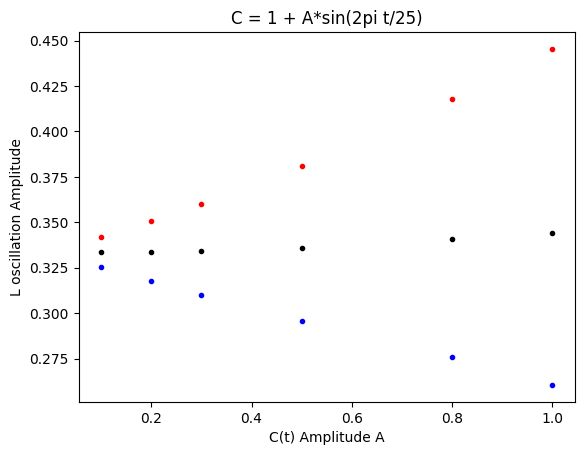

In [ ]:
#fig_ampl, ax_ampl = plt.subplots()
#fig_mean, ax_mean = plt.subplots()
ax_ampl.set_xlabel("C(t) Amplitude A")
ax_ampl.set_ylabel("L oscillation Amplitude")
ax_ampl.set_title("C = 1 + A*sin(2pi t/25)")
fig_ampl

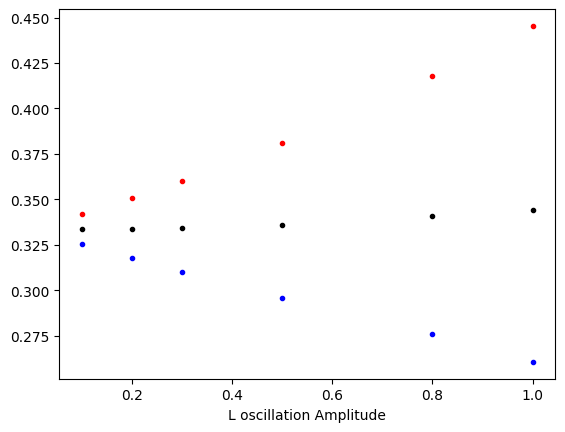

In [ ]:
# Find amplitude and average
T_ref = 100
max = -1
min = 1
mean = e2lave[len(e2lave)-1]
for i in np.arange(0, len(l)):
    if i >= T_ref:
        if l[i] > max:
            max = l[i]
        if l[i] < min:
            min = l[i]

ax_ampl.plot(A, min, '.', color="blue")
ax_ampl.plot(A, max, '.', color="red")
ax_ampl.plot(A, mean, '.', color="black")
fig_ampl